# K-Means Clustering 

Suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang  mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain.<br><br>
*Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan.*
<br><br>
**Formula**

$$
J=\sum_{j=1}^k \sum_{i=1}^n\left\|x_i^{(j)}-c_j\right\|^2
$$
Dengan<br>
$J$ = Objective Function <br>
$k$  = Number of Clusters<br>
$n$  = Number of Cases<br>
$x$  = Case *i*<br>
$c$  = Centroid for Cluster *j*<br>
$\left\|x_i^{(j)}-c_j\right\|^2$ = Dintance Function

**K-Means Clustering ini secara umum dilakukan dengan algoritma dasar sebagai berikut:**
1. Tentukan jumlah cluster
2. Alokasikan data ke dalam cluster secara random
3. Hitung centroid/rata-rata dari data yang ada di masing-masing cluster
4. Alokasikan masing-masing data ke centroid/rata-rata terdekat
5. Kembali ke Step 3, apabila masih ada data yang berpindah cluster atau apabila perubahan nilai centroid, ada yang di atas nilai threshold yang ditentukan atau apabila perubahan nilai pada objective function yang digunakan di atas nilai threshold yang ditentukan

> **K-Means Clustering** bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya juga bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K.

**Ada beberapa kelebihan pada algoritma k-means, yaitu:**

* Mudah untuk diimplementasikan dan dijalankan.
* Waktu yang dibutuhkan untuk menjalankan pembelajaran ini relatif cepat.
* Mudah untuk diadaptasi.
* Umum digunakan.

In [72]:
#Import Modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [73]:
#Menampilkan Dataset
url = "https://raw.githubusercontent.com/diahkamalia/DataMining1/main/IRIS.csv"
#colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
air = pd.read_csv(url)
air.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


>Menentukan fitur yang akan dikelompokkan. Fitur yang akan digunakan antara lain SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.

In [74]:
x = air.iloc[:, 0:4]
y = air.iloc[:, 4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> Fungsi dri **iloc** dalah untuk menentukan baris dan kolom dengan indeks. Untuk mengakses lebih dari satu baris, gunakan tanda kurung ganda dan tentukan indeks, dipisahkan dengan koma. [ , ] merupakan bentuk dari list, [ : ] merupakan bentuk dari slicing.

> Selanjutnya mengubah dataframe ke dalam bentuk Array

In [75]:
x_array = np.array(x)
print(x_array)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

> Lakukan normalisasi data menggunakan metode Min Max Scaler. Normalisasi data digunakan untuk memperkecil jarak antar sehingga memudahkan dalam proses perhitungan.

In [76]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled
dataframe= pd.DataFrame(x_scaled, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
print (dataframe)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns]


> Tentukan dan Konfigurasikan fungsi K-Means dengan mengelompokkan data menjadi 3 cluster

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

In [78]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [79]:
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

>Menentukan Nilai Centroid

In [80]:
print(kmeans.cluster_centers_)

[[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


>Menambahkan kolom Cluster pada dataframe

In [81]:
air["kluster"] = kmeans.labels_

>**Visualisasi hasil clustering**

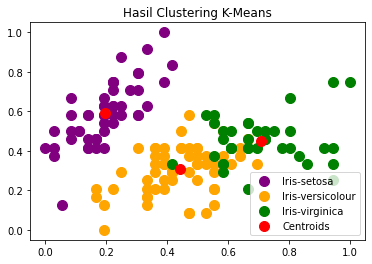

In [82]:
#Opsi 1
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

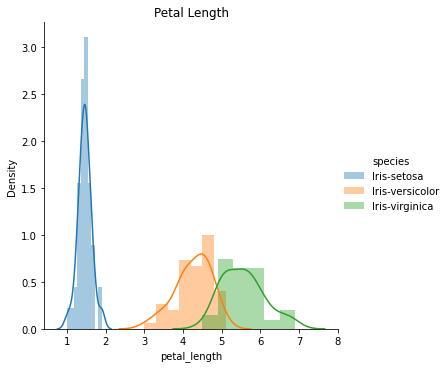

In [83]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(air,hue="species",size=5).map(sns.distplot,"petal_length").add_legend()
plt.title("Petal Length")
plt.show()

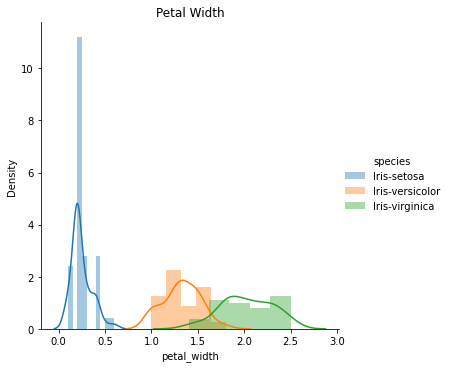

In [84]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(air,hue="species",size=5).map(sns.distplot,"petal_width").add_legend()
plt.title("Petal Width")
plt.show()

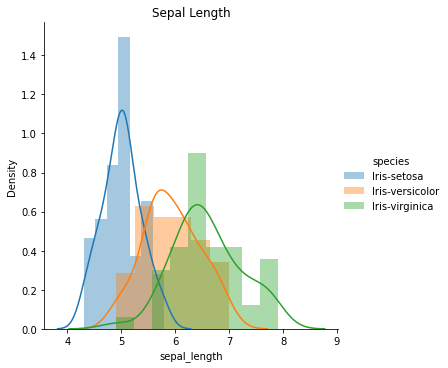

In [85]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(air,hue="species",size=5).map(sns.distplot,"sepal_length").add_legend()
plt.title("Sepal Length")
plt.show()

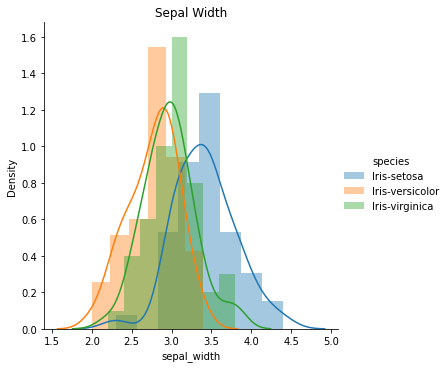

In [86]:
import warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(air,hue="species",size=5).map(sns.distplot,"sepal_width").add_legend()
plt.title("Sepal Width")
plt.show()

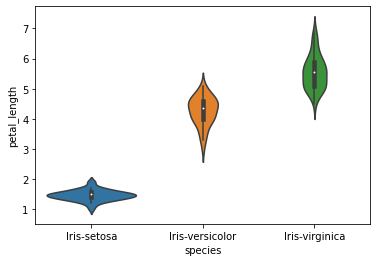

In [87]:
sns.violinplot(x="species",y="petal_length",data=air)
plt.show()

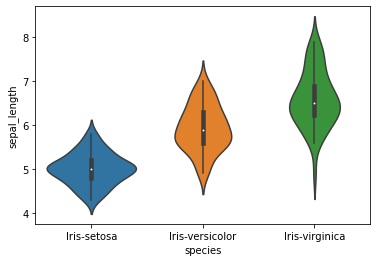

In [88]:
sns.violinplot(x="species",y="sepal_length",data=air)
plt.show()

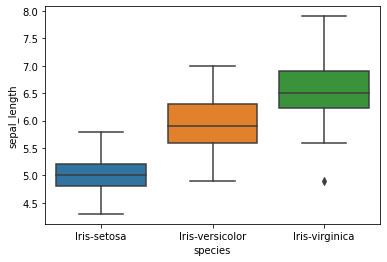

In [89]:
sns.boxplot(x="species",y="sepal_length",data=air)
plt.show()

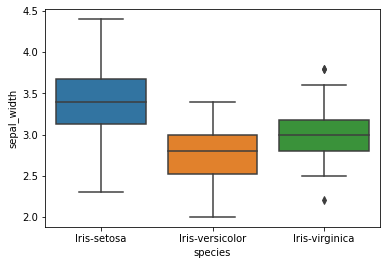

In [90]:
sns.boxplot(x="species",y="sepal_width",data=air)
plt.show()

**Kesimpulan**
>Dari seluruh hasil percobaan tes split yang telah dilakukan, diperoleh hasil split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0005490214732508658. Hasil tes split 3 memiliki nilai split yang terendah.